<a href="https://colab.research.google.com/github/ujjwalkakade09/Prediction/blob/master/Stock_Price_Prediction_Using_RNN_LSTM_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#In this method we are using Artificial Recurrent Neural Network called Long short Term Memory (LSTM) to predict the closing stock price of a coporation called Apple Inc. using the past 60 days stock price and for that we are using the Keras models.


In [1]:
# Import the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing  import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [13]:
#Import the data set of Apple Inc. that are Stock quotes from the Yahoo Finance.

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-02', end='2019-12-17')

# show the data that have imported from Yahoo Finance.

df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [15]:
# Get the number of Rows and coloums in the data set.


df.shape

(2003, 6)

In [16]:
# Printing the info about the data.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB
None


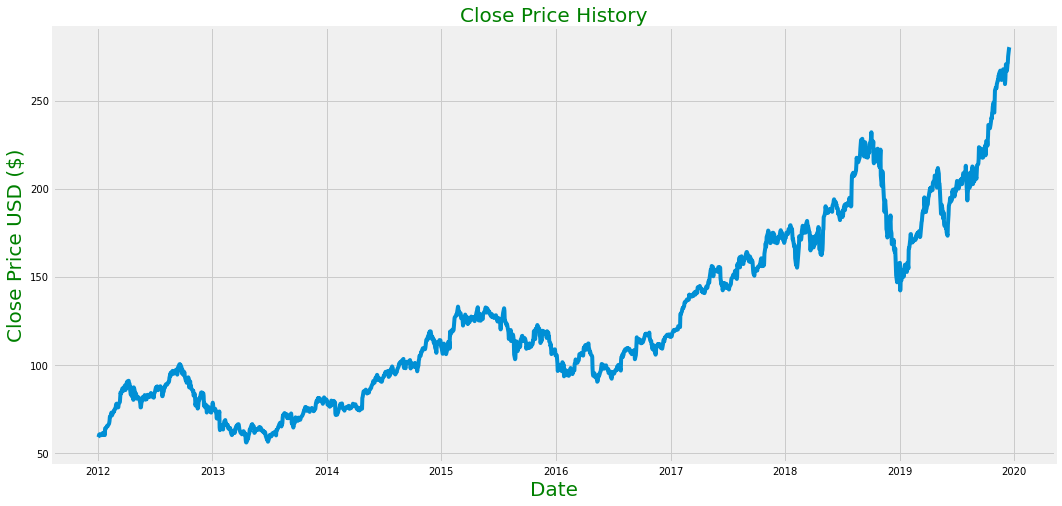

In [22]:
# Visualize the closing price hinstory on the graph.
plt.figure(figsize=(16,8))
plt.title('Close Price History', color='Green', fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date' , color='Green', fontsize=20)
plt.ylabel('Close Price USD ($)', color='Green', fontsize=20)
plt.show()

In [23]:
# Now we are creating new data frame with only "Close" Column.

data = df.filter(['Close'])

# We will convert that dataframe to a numpy array.

dataset = data.values

# In this we will get the number of rows o train the model on.

training_data_len = math.ceil( len(dataset)* .8 )

training_data_len

1603

In [29]:
# Now we have the trained the data after that now we will scale the data to normalization, transformation and preprocessing on input data that helps the model.

scaler = MinMaxScaler(feature_range=(0,1)) # we are sclaing the dataset in range 0 and 1.

scaled_data = scaler.fit_transform(dataset) # this will hold the dataset which scaled and will compute data will transform min & max in the value 0 & 1.

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [38]:
# We will createthe training data set

# for that we will create variable the scaled training data set

train_data = scaled_data[0:training_data_len , :] # In this we are providing lenght if the training data and : will give the all of the column.

# Split the data into x_train and y_train data sets.

x_train = [] # This is the independent training variable or features.
y_train = [] # This is the dependent variable or target variable. 

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) # Here we are going to aooend from the i to 60. not includng the first value.
  y_train.append(train_data[i, 0])  # it contains first 60 values at position i and column position 0.
  if i<= 61: # if we change it with 61st it will give the x_ train data set in array twice for first 60 days and in second pass it will give next 60 days value.
    print(x_train) # It contains the last 60 values.
    print(y_train) # It contains the 61st value that we want our module to predict.
    print()

# In this second array it will give the 2 arrays in the x_train data with first pass throw and second array in second pass throw.
# The first value in the second pass throw array is the same number as second value in the first value.
# In the second pass throw the ending value is the 61st value is same as first( previous) pass throw.

# Now we will have y_train data set with two values that are in bottom.
# and we have the x_train data set in the second last values that are arrays. 



[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [0]:
# New we will convert the x_train and y_train data set to numpy arrays so that we can use it to train the LSTM model.

x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
# we will Reshape the data because the LSTM network will ecxpect input to be 3 Dimentional in the form of number of samples, number of timestapes and number of featurs, as our data set is in 2 Dimentional.

# x_train = np.reshape(x_train,(1543, 60, 1) ) #number of samples is equal to number of rows we have that is 1543, number of timestapes is 60 and number of featurs is 1 that is closing price.

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1) ) #In this x_train.shape[0] is number of rows, x_train.shape[1] is the number of column.

x_train.shape

(1543, 60, 1)

In [0]:
# We will build the LSTM model

model = Sequential() # we will create variable which have value Sequantial.
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1))) # In this we are adding layers to our model LSTM layer and we are ging it 50 neurons and giving return sequesnce is True because we are going to use another LSTM layer, as it is first layer we will give input shape so it is number of timesteps which is 60 in this case so we write it is x_train.shape[1].
model.add(LSTM(50, return_sequences=False)) # In this we will add Second LSTM layer in this we also have 50 neurons this time return sequence will be false because we will not enclude more layers in our model.
model.add(Dense(25)) # In this we will add Dence layer in this we will add 25 neurons.
model.add(Dense(1)) # In this last year we will just add 1 layer

In [0]:
# Now we will Compile the model.
model.compile(optimizer= 'adam', loss='mean_squared_error') #in this we are giving our model adam optimizer while compiling and we are giving our model loss function.

# The Optimizer is used improve the point loss function, and loss function is the how the model did on training.

In [71]:
# Now we will train our model

model.fit(x_train, y_train, batch_size=1, epochs=1) #fit is another name for training data set which is on our input data set.

# In this batch_size is the total number of the training examples present in single batch. Number of epoch is number of iterations when entire data set are passed foreword and backword to neural network.

Epoch 1/1
1543/1543 [==============================] - 60s 39ms/step - loss: 3.3540e-04


In [0]:
# Now we will creat testing dataset, for that we created new array containing values from index 1543 to 2003, This is kind of testing data set.


test_data = scaled_data[training_data_len - 60: , :] # we will store the scaled_data in test_data and it contains data from index that is training_data_len - number of days that 60 in this example to 2003 2hich is end of our data set we represent it as ':' (all of the column).


# we will create the data set x_test and y_test

x_test = []     # It contains past 60 values.
y_test = dataset[training_data_len:, : ] # it is all of the values that we want our model to predict for the rest of the data. These are the actual text values.
for i in range(60, len(test_data)): 
  x_test.append(test_data[i-60:i, 0]) # we are going to append the test dataset from position i-60.


In [0]:
# We will convert the data into a numpy array.

x_test = np.array(x_test) # we are converting test values in numpy array so that we can use it in the LSTM model.

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1] , 1)) #we are reshaping the test model because our data is 2 dimentional and LSTM model expects 3 Dimentional values.

# we have x_test.shape[0] as number of rows that is number of samples we have. 
# we have x_test.shape[1] as number of column which is number of timesteps .
# The last number 1 is number of features that we have which just the close price.

In [0]:
# We will get the models predicted price values and this is for the x_test data set.

predictions = model.predict(x_test)  # we create the variable called Predictions  in which we will get the exact same values as y_test once we inverse transform the data.

predictions = scaler.inverse_transform(predictions) #In this we are unscaling the values as we want prediction values exact same as y_test data. We are getting these predictions based on the x_test datasets.

In [81]:
# Now we get the root mean squared error (RMSE) it is good measure of how accurate model Predict the response.
# it is Standerd deviation of the residual and lower values of RMSE indicate a better fit.
rmse = np.sqrt(np.mean( predictions - y_test)**2 ) # we have created the variable called rmse.
rmse

0.2853996276855469

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


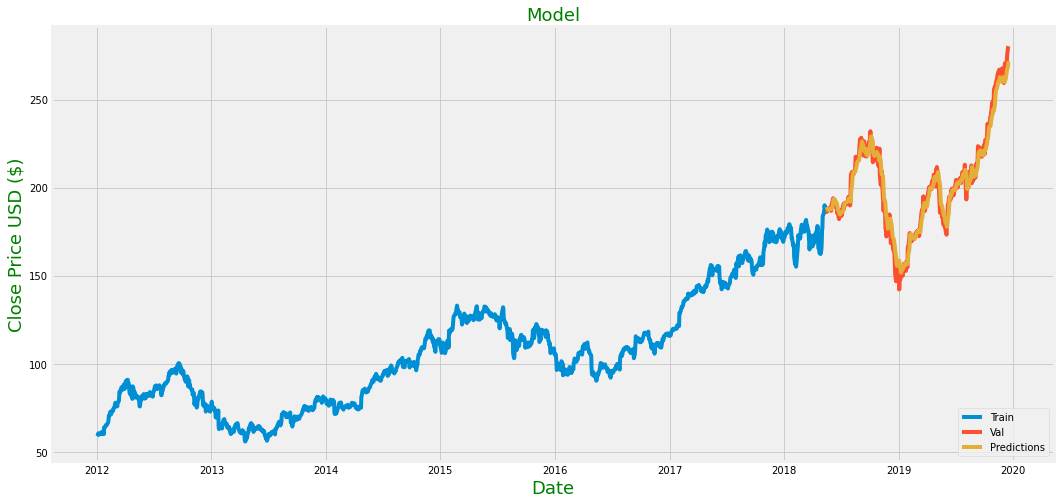

In [86]:
# Now we will plot the data on graph.

train = data[:training_data_len] # Data contains the values from index zero till training_data_leg.
valid = data[training_data_len:] # validation data set it contains data from index data training till end of the data set.
valid['Predictions'] = predictions # we will creat another colunm called Prediction Table.

# Visualize the data

plt.figure(figsize=(16,8)) #We have defined the Figure Size.
plt.title('Model', color='Green', fontsize=18)
plt.xlabel('Date', color='Green', fontsize=18)
plt.ylabel('Close Price USD ($)', color='Green', fontsize=18)
plt.plot(train['Close']) #we are giving our plot some data as we want closing data so it is in Close data.
plt.plot(valid[['Close', 'Predictions']]) # Here we defined the Actual close price and Predicted Price.
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right') # Here we inpute train data set, validation data set and prediction data set. We have give the Location on the Lower right of the graph.
plt.show()


In [0]:
#Blue is the data in which this model is trained on. 
#Red+orange is the actual closing values for the apple stocks values for the rest of the days. 
#Orange+Yellow is the prediction as the our model is predicted.

In [87]:
# Now we will se the Valid(Validation) and Predicted(Predictions) Prices.
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,188.997269
2018-05-18,186.309998,188.371964
2018-05-21,187.630005,187.648239
2018-05-22,187.160004,187.354919
2018-05-23,188.360001,187.183258
...,...,...
2019-12-11,270.769989,264.633118
2019-12-12,271.459991,265.963684
2019-12-13,275.149994,267.206543


In [90]:
# Now we will predict the Closing Stock price for the one perticular day. In that the perticular Date we have choosen is 2019-12-18.

apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
 
#Create a New dataframe

new_df = apple_quote.filter(['Close']) # In this we are getting just Close column.

#Get the last 60 days closing price values and convert the dayaframe to an array

last_60_days = new_df[-60:].values  #Create variable which contains last 60 values and put(.values) to convert it into array.

#We have to scale data to be values between 0 and 1.

last_60_days_scaled = scaler.transform(last_60_days)  #in this variable we are calling scaler we are not using fit transform because we are using MinMax values when we first transform data. We will transfor the data using old values.

# Create and empty list.

X_test = [] 

# we will Append the past 60 days.

X_test.append(last_60_days_scaled) #We are appending the last 60 days prices that are scaled variable or data set.

# Convert the X_test data set to a numpy array

X_test = np.array(X_test) #we have the numpy array in the LSTM model.

#Now we will Reshape the data.

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # In this we are reshaping data of X_test in which X_test.shape[0] as number of sample at posiotion at zero, X_test.shape[1] as number of timesteps, and 1 as the number of features.

# Now we will get the Predicted scaled Price.

pred_price = model.predict(X_test) # Create the variable called Predicted Price and giveing the X_test data.

#We will undu the scalling.

pred_price = scaler.inverse_transform(pred_price) #We will inverse transform the Predicted price

print(pred_price)

[[274.3273]]


In [93]:
# Now we will see the actual price on that day. that is 2019-12-18.

apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')

#Printing the actual values of Closing price on that day that is 2019-12-18.

print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
